# Capítulo 7. Aprendizaje en Conjunto y Random Forest

## Aprendizaje en Conjunto y Random Forest — Qué son y para qué sirven

---

## 1. Clasificador de Votaciones (Voting Classifier)
**Qué es:**  
Un modelo de conjunto que combina varios clasificadores y toma la decisión final mediante votación (mayoría o promedio de probabilidades).

**Para qué sirve:**  
- Mejorar el rendimiento al combinar diferentes modelos.  
- Reducir variabilidad y errores individuales.  
- Aumentar robustez en comparación con un solo clasificador.

---

## 2. Bagging y Pasting
**Qué es:**  
Técnicas de entrenamiento en conjunto que crean múltiples modelos entrenados en subconjuntos de datos:
- **Bagging:** muestreo con reemplazo.  
- **Pasting:** muestreo sin reemplazo.

**Para qué sirve:**  
- Reducir la varianza del modelo.  
- Entrenar modelos independientes que mejoran el rendimiento conjunto.  
- Especialmente útil con modelos inestables como árboles de decisión.

---

### 2.1 Evaluación Out-of-Bag (OOB)
**Qué es:**  
Una forma de validar un modelo tipo bagging usando las muestras que quedaron fuera de cada bootstrap.

**Para qué sirve:**  
- Obtener una evaluación del rendimiento sin usar un conjunto de validación adicional.  
- Mejorar la eficiencia en datasets pequeños.

---

## 3. Random Subspace
**Qué es:**  
Una técnica que entrena cada estimador usando solo un subconjunto aleatorio de **características**.

**Para qué sirve:**  
- Reducir correlación entre modelos.  
- Mejorar estabilidad del conjunto.  
- Útil cuando hay muchas características.

---

## 4. Random Forest
**Qué es:**  
Un modelo de conjunto basado en muchos árboles de decisión entrenados mediante bagging y selección aleatoria de características.

**Para qué sirve:**  
- Lograr alta precisión con bajo sobreajuste.  
- Manejar datos con muchas variables y relaciones complejas.  
- Proveer medidas de importancia de características.

---

### 4.1 Predictores
**Qué es:**  
Los árboles individuales que componen el Random Forest, cada uno entrenado con diferentes muestras y subconjuntos de características.

**Para qué sirve:**  
- Aportar diversidad al bosque.  
- Reducir el riesgo de que el modelo se sobreajuste.

---

## 5. Boosting
**Qué es:**  
Un método de conjunto que entrena modelos secuencialmente, donde cada nuevo modelo corrige los errores del anterior.

**Para qué sirve:**  
- Crear conjuntos fuertes a partir de modelos débiles.  
- Mejorar la precisión en tareas complejas.  
- Adaptarse a patrones difíciles de capturar.

---

### 5.1 AdaBoost
**Qué es:**  
Un algoritmo de boosting que ajusta el peso de cada ejemplo según si fue clasificado correctamente.

**Para qué sirve:**  
- Enfocar el entrenamiento en los ejemplos más difíciles.  
- Crear modelos precisos con clasificadores débiles.

---

### 5.2 Boosting con Gradiente (Gradient Boosting)
**Qué es:**  
Un método que construye modelos secuenciales ajustándose al gradiente del error.

**Para qué sirve:**  
- Resolver tanto regresión como clasificación.  
- Capturar relaciones altamente no lineales.  
- Ser una base de modelos muy potentes como XGBoost, LightGBM y CatBoost.

---

## 6. Stacking
**Qué es:**  
Una técnica donde varios modelos base generan predicciones que luego alimentan a un modelo final (meta-modelo).

**Para qué sirve:**  
- Combinar modelos heterogéneos de manera más flexible que el voting o bagging.  
- Aprovechar fortalezas individuales para mejorar el rendimiento global.  


## <span style="color:green">1.Clasificador de Votaciones </span>

In [3]:
#Importa las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#Importa los clasificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Este no lo conocían, se los presento
#Este VotingClassifier va a recibir los modelos y va a contar los votos de los resultados
from sklearn.ensemble import VotingClassifier  

In [5]:

candidates = {
    "gmat": [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
    "gpa": [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
    "work_experience": [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
    "admitted": [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
}

# Convertir a DataFrame
df = pd.DataFrame(candidates)
df.head()


,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [6]:
X = df[['gmat', 'gpa', 'work_experience']]  # características
y = df['admitted']  # variable a predecir


In [7]:
from sklearn.model_selection import train_test_split

# Dividir los datos en train y test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [8]:

# Generar los objetos de los modelos
svm = SVC()  # modelo SVM con valores por defecto
arbol = DecisionTreeClassifier(max_depth=2)  # árbol de decisión con profundidad máxima 2


In [9]:

# Generar el objeto de VotingClassifier combinando SVM y árbol de decisión
voting_clf = VotingClassifier(estimators=[('svm', svm), ('arbol', arbol)], voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC()),
                             ('arbol', DecisionTreeClassifier(max_depth=2))])

En caso de querer una votación suave, poner en voting="Soft" (más adelante se ejemplifica)

In [10]:
from sklearn.metrics import accuracy_score

# Lista de modelos
modelos = [svm, arbol, voting_clf]

# Ciclar a través de los modelos
for modelo in modelos:
    # Ajustar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Predecir los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular y mostrar el puntaje de exactitud
    print(f'{modelo.__class__.__name__} Accuracy:', accuracy_score(y_test, y_pred))


SVC Accuracy: 0.625
DecisionTreeClassifier Accuracy: 1.0
VotingClassifier Accuracy: 0.625


In [11]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# En caso de querer un margen suave
svm = SVC(probability=True)
arbol = DecisionTreeClassifier(max_depth=2)

votos = VotingClassifier(
    estimators=[("svm", svm), ("arbol", arbol)],
    voting="soft"
)

# Ciclar a través de los modelos
for i in (svm, arbol, votos):
    # Ajustar
    i.fit(X_train, y_train)
    
    # Predecir
    y_pred = i.predict(X_test)
    
    # Exactitud
    print(i.__class__.__name__, accuracy_score(y_test, y_pred))


SVC 0.625
DecisionTreeClassifier 1.0
VotingClassifier 1.0


***

## <span style="color:green">2. Bagging y Pasting </span>

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear el clasificador Bagging a partir de un árbol de decisión
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,   # cantidad de árboles
    max_samples=10,     # cantidad de datos por muestra
    bootstrap=True      # Bagging
)

# Ajustar el modelo
bagging.fit(X_train, y_train)

# Predecir
y_pred = bagging.predict(X_test)

# Exactitud
accuracy_score(y_test, y_pred)


1.0

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

pasting = BaggingClassifier(
    SVC(),
    n_estimators=50,   
    max_samples=15,     
    bootstrap=False    
)


pasting.fit(X_train, y_train)


y_pred = pasting.predict(X_test)

accuracy_score(y_test, y_pred)


0.5

Pasting no suele ser utilizado en ejemplos reales. El puntaje de exactitud evidencia que es un pésimo modelo

***

### <span style="color:blue">2.1 Evaluación Out-of-Bag  </span>

In [14]:


# Crear el clasificador Bagging con evaluación OOB
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=10,
    bootstrap=True,
    oob_score=True
)

# Ajustar
bagging.fit(X_train, y_train)

# Visualizar el puntaje OOB
bagging.oob_score_


0.8125

Este puntaje es un parámetro extra, puedes concluir si hay o no un ajuste con base a los parámetros que ya sacaste y el puntaje OOB.

***

## <span style="color:green">3. Random Subspace </span>

In [15]:

# Crear el clasificador Bagging
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=10,
    bootstrap=True,
    max_features=2,  
    oob_score=True
)

# Ajustar
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2,
                  max_samples=10, n_estimators=100, oob_score=True)

In [16]:
from sklearn.metrics import accuracy_score

# Ajustar
bagging.fit(X_train, y_train)

# Predecir
y_pred = bagging.predict(X_test)

# Puntaje de exactitud
accuracy_score(y_test, y_pred)


1.0

## <span style="color:green">4. Random Forest </span>

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=4,
    max_features=2
)


In [18]:
# Ajustar el modelo Random Forest
rf.fit(X_train, y_train)


RandomForestClassifier(max_features=2, max_leaf_nodes=4)

In [19]:
# Hacer las predicciones
y_pred = rf.predict(X_test)


In [20]:
# Visualizar el puntaje
accuracy_score(y_test, y_pred)


1.0

En el futuro, no les pedirán bagging, se prefiere utilizar Random Forest

### <span style="color:blue">4.1 Predictores </span>

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Realizar el Random Forest de manera aleatoria
random = RandomForestClassifier(n_estimators=100)

# Ajustar el modelo
random.fit(X_train, y_train)

# Mostrar la importancia de cada predictor
for nombre, score in zip(X_train.columns, random.feature_importances_):
    print(nombre, score)


gmat 0.31793445442869167
gpa 0.2990279975412724
work_experience 0.38303754803003603


El valor que arroja en cada variable es equivalente al nivel de importancia de la misma. En este caso el **gpa** es la variable que tiene mayor peso en la decisión

## <span style="color:green">5. Boosting </span>

### <span style="color:blue">5.1 Adaboost </span>

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# Crear el clasificador AdaBoost con árboles de decisión
ada = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    learning_rate=0.1
)

# Ajustar el modelo
ada.fit(X_train, y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [23]:
# Predecir con AdaBoost
y_pred = ada.predict(X_test)

# Calcular la exactitud
accuracy_score(y_test, y_pred)


1.0

### <span style="color:blue">5.2 Boosting con Gradiente </span>

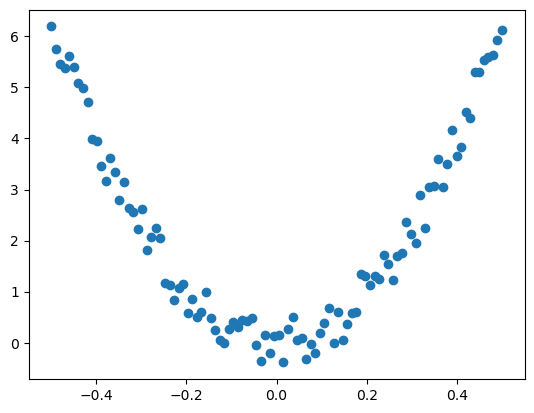

In [24]:
m = 100
X = np.linspace(-0.5, 0.5, m).reshape(-1, 1)
y = 25 * X.ravel()**2 + np.random.random(m) - 0.5  

plt.scatter(X, y)


In [25]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

# Ajustar el modelo
tree.fit(X, y)


DecisionTreeRegressor(max_depth=2)

In [26]:
# Predecir con el árbol
y_pred = tree.predict(X)

# Calcular los errores residuales
errores = y - y_pred



In [27]:
# Crear el segundo predictor para ajustar los residuales
tree2 = DecisionTreeRegressor(max_depth=2)

# Ajustar el segundo árbol con los residuales
tree2.fit(X, errores)


DecisionTreeRegressor(max_depth=2)

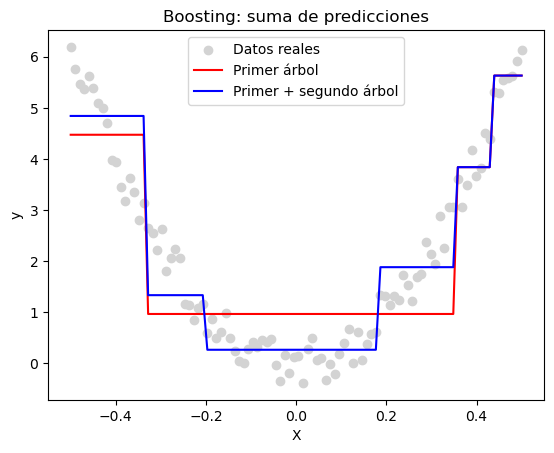

In [28]:
# Predicciones del primer y segundo árbol
y_pred1 = tree.predict(X)
y_pred2 = tree2.predict(X)

# Suma de las predicciones
y_comb = y_pred1 + y_pred2

# Visualización
plt.scatter(X, y, color='lightgray', label='Datos reales')
plt.plot(X, y_pred1, color='red', label='Primer árbol')
plt.plot(X, y_comb, color='blue', label='Primer + segundo árbol')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Boosting: suma de predicciones")
plt.legend()
plt.show()


In [29]:
# Calcular los residuales del modelo combinado (primer + segundo árbol)
errores2 = y - y_comb

# Crear el tercer predictor
tree3 = DecisionTreeRegressor(max_depth=2)

# Ajustar el tercer árbol con los nuevos residuales
tree3.fit(X, errores2)


DecisionTreeRegressor(max_depth=2)

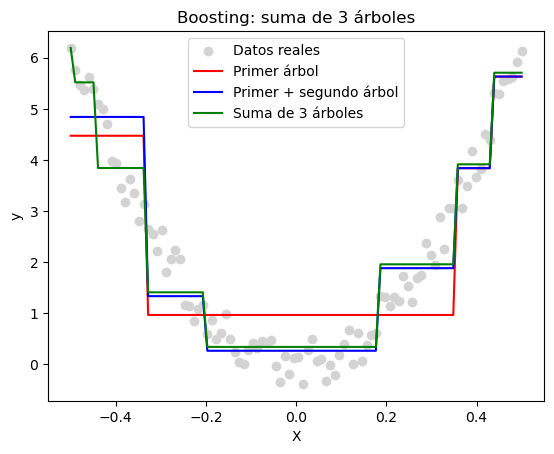

In [30]:
# Predicciones del tercer árbol
y_pred3 = tree3.predict(X)

# Suma de las predicciones de los tres árboles
y_comb3 = y_pred1 + y_pred2 + y_pred3

# Visualización
plt.scatter(X, y, color='lightgray', label='Datos reales')
plt.plot(X, y_pred1, color='red', label='Primer árbol')
plt.plot(X, y_comb, color='blue', label='Primer + segundo árbol')
plt.plot(X, y_comb3, color='green', label='Suma de 3 árboles')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Boosting: suma de 3 árboles")
plt.legend()
plt.show()

In [31]:
# Tercer árbol
tree3 = DecisionTreeRegressor(max_depth=2)
tree3.fit(X, errores2)
y_pred3 = tree3.predict(X)
y_comb3 = y_pred1 + y_pred2 + y_pred3


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Crear el modelo de Gradient Boosting
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

# Calcular los errores medios cuadrados en cada etapa
errores = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

# Mejor iteración (menor error)
mejor = np.argmin(errores)
mejor


65

En este caso el mejor caso es en **56** de los 120 árboles que probamos por lo que deberíamos crear nuestro modelo con 56 árboles de decisión.

In [33]:
from xgboost import XGBRegressor

# Crear el modelo XGBoost
xgb = XGBRegressor()

# Ajustar el modelo
xgb.fit(X_train, y_train)

# Predecir
y_pred = xgb.predict(X_test)


In [34]:
from xgboost import XGBRegressor

# Crear el modelo XGBoost con early stopping
xgb = XGBRegressor(early_stopping_rounds=1)

# Ajustar el modelo con early stopping
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # evaluar en el conjunto de prueba
    verbose=False                  # sin mensajes de progreso
)

# Predecir con el modelo entrenado
y_pred = xgb.predict(X_test)


## <span style="color:green">6. Stacking </span>

In [35]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Generar los modelos base
arbol = DecisionTreeRegressor(max_depth=20)
lineal = LinearRegression()
random = RandomForestRegressor()

# Crear el Stacking Regressor
stacking = StackingRegressor(
    estimators=[
        ("arbol", arbol),
        ("lineal", lineal),
        ("random", random)
    ]
)

# Ajustar el modelo usando todos los datos
stacking.fit(X, y)


StackingRegressor(estimators=[('arbol', DecisionTreeRegressor(max_depth=20)),
                              ('lineal', LinearRegression()),
                              ('random', RandomForestRegressor())])